In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r'C:\Users\M RAJESH\Desktop\Ekeeda DS\Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
fd = pd.read_csv(r'C:\Users\M RAJESH\Desktop\Ekeeda DS\wine_data.csv',header=None , usecols=[0,1,2] )

In [5]:
fd.columns = ['Class label','Alcohol','Malic acid']

In [6]:
fd.shape

(178, 3)

In [7]:
fd.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

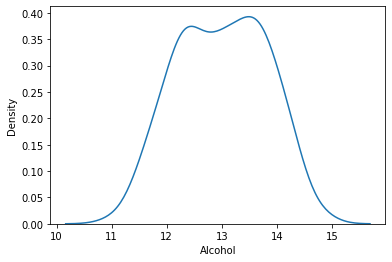

In [8]:
sns.kdeplot(fd['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

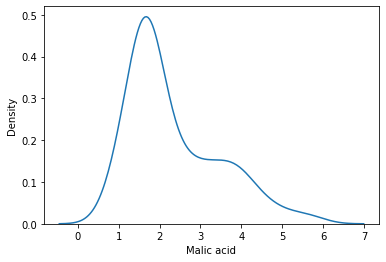

In [9]:
sns.kdeplot(fd['Malic acid'])

<AxesSubplot:xlabel='Class label', ylabel='Density'>

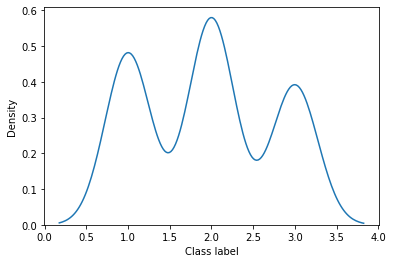

In [10]:
sns.kdeplot(fd['Class label'])

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

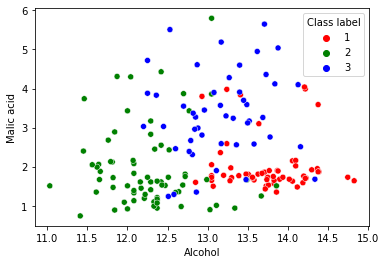

In [11]:
color = {1:'red',2:'green',3:'blue'}
sns.scatterplot(fd['Alcohol'],fd['Malic acid'],hue=fd['Class label'],palette=color)

In [12]:
x = fd.drop('Class label',axis=1)
y = fd['Class label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
x_train.shape , x_test.shape

((124, 2), (54, 2))

In [14]:
fd['Alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64

In [15]:
len(fd['Alcohol'])

178

In [16]:
fd['Alcohol'].max()

14.83

In [17]:
g=[]
for i in fd['Alcohol']:
    
    a=(fd['Alcohol']-fd['Alcohol'].mean())/(fd['Alcohol'].max()-fd['Alcohol'].min())
    g.append(a)
    break

In [18]:
g

[0      0.323522
 1      0.052469
 2      0.041943
 3      0.360364
 4      0.062995
          ...   
 173    0.186679
 174    0.105101
 175    0.070890
 176    0.044574
 177    0.297206
 Name: Alcohol, Length: 178, dtype: float64]

In [19]:
r=pd.DataFrame(g).T
r

,Alcohol
0,0.323522
1,0.052469
2,0.041943
3,0.360364
4,0.062995
...,...
173,0.186679
174,0.105101
175,0.070890
176,0.044574


In [20]:
fd = fd.assign(new_alcohol=r)

In [21]:
fd.head()

,Class label,Alcohol,Malic acid,new_alcohol
0,1,14.23,1.71,0.323522
1,1,13.20,1.78,0.052469
2,1,13.16,2.36,0.041943
3,1,14.37,1.95,0.360364
4,1,13.24,2.59,0.062995


In [22]:
fd[['new_alcohol','Alcohol']].head(50)

,new_alcohol,Alcohol
0,0.323522,14.23
1,0.052469,13.20
2,0.041943,13.16
3,0.360364,14.37
4,0.062995,13.24
5,0.315627,14.20
6,0.365627,14.39
7,0.278785,14.06
8,0.481416,14.83
9,0.226153,13.86


Text(0.5, 1.0, 'after')

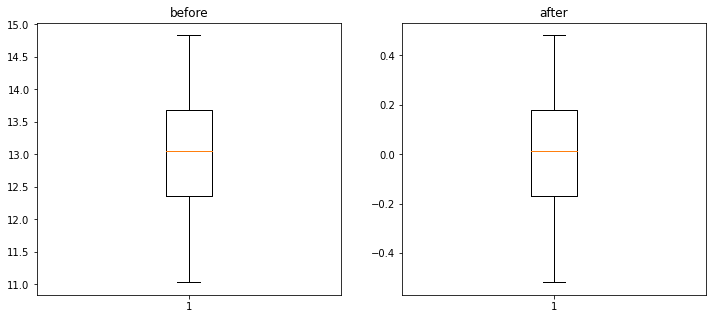

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.boxplot(fd['Alcohol'])
ax1.set_title('before')
ax2.boxplot(fd['new_alcohol'])
ax2.set_title('after')

# effect of outliers

In [24]:
fd2 = fd.append(pd.DataFrame({'Alcohol':[5,45,30],'Malic acid':[10,-10,20],'Class label':[2,1,3]}),ignore_index=True)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_17112\3046670249.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fd2 = fd.append(pd.DataFrame({'Alcohol':[5,45,30],'Malic acid':[10,-10,20],'Class label':[2,1,3]}),ignore_index=True)


In [25]:
fd2

,Class label,Alcohol,Malic acid,new_alcohol
0,1,14.23,1.71,0.323522
1,1,13.20,1.78,0.052469
2,1,13.16,2.36,0.041943
3,1,14.37,1.95,0.360364
4,1,13.24,2.59,0.062995
...,...,...,...,...
176,3,13.17,2.59,0.044574
177,3,14.13,4.10,0.297206
178,2,5.00,10.00,NaN
179,1,45.00,-10.00,NaN


In [26]:
g=[]
for i in fd2['Alcohol']:
    
    a=(fd2['Alcohol']-fd2['Alcohol'].mean())/(fd2['Alcohol'].max()-fd2['Alcohol'].min())
    g.append(a)
    break

In [27]:
k=pd.DataFrame(g).T
fd3 = fd2.assign(new_al=k)

In [28]:
k

,Alcohol
0,0.025072
1,-0.000678
2,-0.001678
3,0.028572
4,0.000322
...,...
176,-0.001428
177,0.022572
178,-0.205678
179,0.794322


In [29]:
fd3

,Class label,Alcohol,Malic acid,new_alcohol,new_al
0,1,14.23,1.71,0.323522,0.025072
1,1,13.20,1.78,0.052469,-0.000678
2,1,13.16,2.36,0.041943,-0.001678
3,1,14.37,1.95,0.360364,0.028572
4,1,13.24,2.59,0.062995,0.000322
...,...,...,...,...,...
176,3,13.17,2.59,0.044574,-0.001428
177,3,14.13,4.10,0.297206,0.022572
178,2,5.00,10.00,NaN,-0.205678
179,1,45.00,-10.00,NaN,0.794322


Text(0.5, 1.0, 'after')

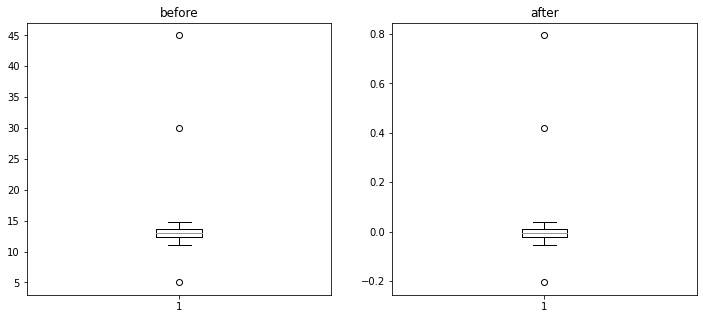

In [30]:
fig, (ax3, ax4) = plt.subplots(ncols=2 , figsize=(12,5))
ax3.boxplot(fd3['Alcohol'])
ax3.set_title('before')
ax4.boxplot(fd3['new_al'])
ax4.set_title('after')

{'whiskers': [<matplotlib.lines.Line2D at 0x16fc5b2d640>,
 'caps': [<matplotlib.lines.Line2D at 0x16fc5b2db50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16fc5b2d370>],
 'medians': [<matplotlib.lines.Line2D at 0x16fc5b3c130>],
 'fliers': [<matplotlib.lines.Line2D at 0x16fc5b3c400>],
 'means': []}

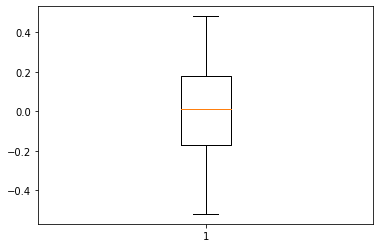

In [31]:
plt.boxplot(fd['new_alcohol'])

In [32]:
fd['new_alcohol'].quantile(0.25) , fd3['new_al'].quantile(0.25)

(-0.16792578356002208, -0.02167817679557995)

In [33]:
fd['new_alcohol'].quantile(0.75) , fd3['new_al'].quantile(0.75)

(0.1781268480189253, 0.01157182320442005)

In [34]:
fd['new_alcohol'].quantile(0.75)-fd['new_alcohol'].quantile(0.25)  , fd3['new_al'].quantile(0.75)-fd3['new_al'].quantile(0.25)

(0.3460526315789474, 0.03325)

In [35]:
fd['new_alcohol'].quantile(0.25)-(1.5*(fd['new_alcohol'].quantile(0.75)-fd['new_alcohol'].quantile(0.25))) , fd['new_alcohol'].quantile(0.75) +(1.5*fd['new_alcohol'].quantile(0.75)-fd['new_alcohol'].quantile(0.25))

(-0.6870047309284432, 0.6132429036073354)

In [36]:
fd3['new_al'].quantile(0.25)-(1.5*(fd3['new_al'].quantile(0.75)-fd3['new_al'].quantile(0.25))) , fd3['new_al'].quantile(0.75)+(1.5*(fd3['new_al'].quantile(0.75)-fd3['new_al'].quantile(0.25)))

(-0.07155317679557996, 0.061446823204420055)

In [37]:
fd['Alcohol'].max()-fd['Alcohol'].min()

3.8000000000000007

In [38]:
fd.Alcohol.dtype

dtype('float64')

In [39]:
fd['alcohol_new'] = fd.Alcohol.apply(lambda x : (x-fd['Alcohol'].mean())/((fd['Alcohol'].max()-fd['Alcohol'].min())))

In [40]:
fd

,Class label,Alcohol,Malic acid,new_alcohol,alcohol_new
0,1,14.23,1.71,0.323522,0.323522
1,1,13.20,1.78,0.052469,0.052469
2,1,13.16,2.36,0.041943,0.041943
3,1,14.37,1.95,0.360364,0.360364
4,1,13.24,2.59,0.062995,0.062995
...,...,...,...,...,...
173,3,13.71,5.65,0.186679,0.186679
174,3,13.40,3.91,0.105101,0.105101
175,3,13.27,4.28,0.070890,0.070890
176,3,13.17,2.59,0.044574,0.044574
